In [55]:
import numpy as np
import matplotlib.pyplot as plt
import time


# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [51]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
def generate_data(m):

    w = np.random.randn(10)
    w = w / np.linalg.norm(w)
    
    X = []
    Y = []
    
    for i in range(m):
        x_i = np.random.randn(10)
        prob = sigmoid(np.dot(w, x_i))
        y_i = np.random.binomial(1, prob)
        
        X.append(x_i)
        Y.append(y_i)
    
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y, w

In [28]:
# x=[]
# y=[]
# x,y = generate_data(10)
# print(x)
# print(y)

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [59]:
from sklearn.linear_model import LogisticRegression

def logistic_regression_training(X, y):
    model = LogisticRegression(max_iter=1000)
    model.fit(X, y)
    return model.coef_.flatten()

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [63]:
def gradient_descent_square_loss(X, y, eta=0.01, iterations=1000):
    m, n = X.shape
    weight = np.random.randn(n)
    
    for t in range(iterations):
        sigma_vals = sigmoid(np.dot(X, weight))
        errors = sigma_vals - y
        gradient = np.dot(X.T, errors * sigma_vals * (1 - sigma_vals)) / m
        weight -= eta * gradient
    
    return weight

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [42]:
def stochastic_gradient_descent_square_loss(X, y, eta=0.01, iterations=1000):
    m, n = X.shape
    weight = np.random.randn(n)
    
    for t in range(iterations):
        i = np.random.randint(m)
        x_i = X[i]
        y_i = y[i]
        sigma_val = sigmoid(np.dot(weight, x_i))
        error = sigma_val - y_i
        gradient = error * sigma_val * (1 - sigma_val) * x_i
        weight -= eta * gradient
    
    return weight

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

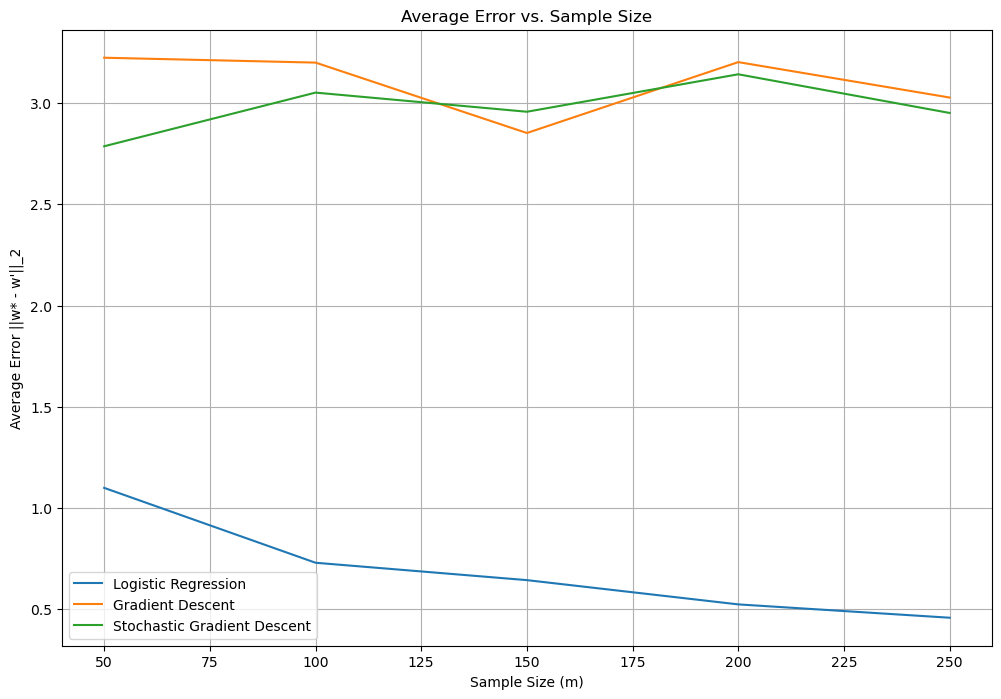

Time taken by Logistic Regression: 0.19624733924865723 seconds
Time taken by Gradient Descent: 1.7693901062011719 seconds
Time taken by Stochastic Gradient Descent: 0.9437525272369385 seconds


In [65]:
def evaluate_algorithms(sample_sizes, num_trials=10):
    errors = {
        'logistic_regression': [],
        'gradient_descent': [],
        'stochastic_gradient_descent': []
    }
    times = {
        'logistic_regression': 0,
        'gradient_descent': 0,
        'stochastic_gradient_descent': 0
    }
    
    for m in sample_sizes:
        lr_errors = []
        gd_errors = []
        sgd_errors = []
        
        for _ in range(num_trials):
            X, y, true_weight = generate_data(m)
            
            # Logistic Regression
            start_time = time.time()
            weight_lr = logistic_regression_training(X, y)
            times['logistic_regression'] += time.time() - start_time
            lr_errors.append(np.linalg.norm(true_weight - weight_lr))
            
            # Gradient Descent
            start_time = time.time()
            weight_gd = gradient_descent_square_loss(X, y)
            times['gradient_descent'] += time.time() - start_time
            gd_errors.append(np.linalg.norm(true_weight - weight_gd))
            
            # Stochastic Gradient Descent
            start_time = time.time()
            weight_sgd = stochastic_gradient_descent_square_loss(X, y)
            times['stochastic_gradient_descent'] += time.time() - start_time
            sgd_errors.append(np.linalg.norm(true_weight - weight_sgd))
        
        errors['logistic_regression'].append(np.mean(lr_errors))
        errors['gradient_descent'].append(np.mean(gd_errors))
        errors['stochastic_gradient_descent'].append(np.mean(sgd_errors))
    
    return errors, times

sample_sizes = [50, 100, 150, 200, 250]
errors, times = evaluate_algorithms(sample_sizes)

plt.figure(figsize=(12, 8))
plt.plot(sample_sizes, errors['logistic_regression'], label='Logistic Regression')
plt.plot(sample_sizes, errors['gradient_descent'], label='Gradient Descent')
plt.plot(sample_sizes, errors['stochastic_gradient_descent'], label='Stochastic Gradient Descent')
plt.xlabel('Sample Size (m)')
plt.ylabel('Average Error ||w* - w\'||_2')
plt.title('Average Error vs. Sample Size')
plt.legend()
plt.grid(True)
plt.show()

print("Time taken by Logistic Regression:", times['logistic_regression'], "seconds")
print("Time taken by Gradient Descent:", times['gradient_descent'], "seconds")
print("Time taken by Stochastic Gradient Descent:", times['stochastic_gradient_descent'], "seconds")

# Problem 2

In [3]:
from sklearn import datasets

In [4]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

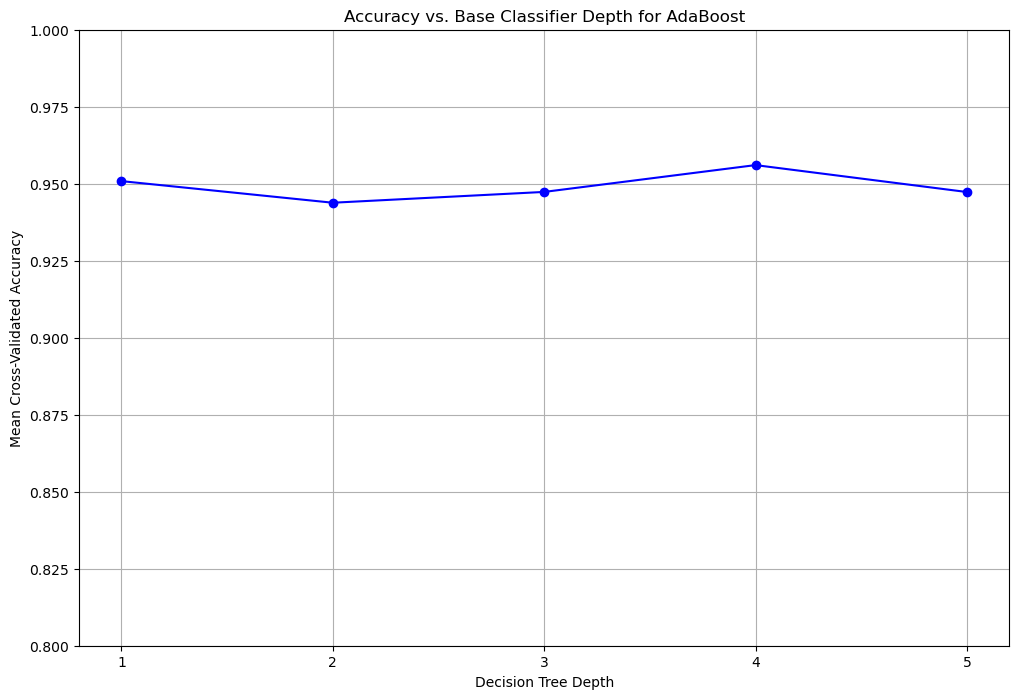

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

data = load_breast_cancer()
X = data.data
y = data.target

depths = range(1, 6)
mean_accuracies = []
kf = KFold(n_splits=10, shuffle=True, random_state=101)

for depth in depths:
    base_learner = DecisionTreeClassifier(max_depth=depth, random_state=101)
    ada_boost = AdaBoostClassifier(estimator=base_learner, n_estimators=10, learning_rate=1,algorithm='SAMME', random_state=101) 
    # not setting the algorithm to 'SAMME' gives warning so i have set it.
    accuracies = cross_val_score(ada_boost, X, y, cv=kf, scoring='accuracy')
    mean_accuracies.append(np.mean(accuracies))

plt.figure(figsize=(12, 8))
plt.plot(depths, mean_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Accuracy vs. Base Classifier Depth for AdaBoost')
plt.grid(True)
plt.xticks(depths)
plt.ylim([0.8, 1.0])
plt.show()
